In [1]:
import spikeinterface.full as si
import numpy as np
import pickle

In [2]:
with open('NPXprobe.pkl', 'rb') as outp: 
    probe = pickle.load(outp)
print(probe)

Probe - 384ch - 1shanks


In [3]:
# stabilisation
file = "/Volumes/waking/audrey_hay/NPX/NPX1/VB/Expe_2024-07-22_17-29-40/NP_spikes_2024-07-22T17_29_40.raw"


# vrai enregisstrement
file = "/Volumes/waking/audrey_hay/NPX/NPX1/VB/Expe_2024-07-22_17-55-16/NP_spikes_2024-07-22T17_55_16.raw"

In [4]:
raw_rec = si.read_binary(file, dtype='uint16', num_channels=384, sampling_frequency=30_000.)
raw_rec = raw_rec.set_probe(probe)
raw_rec

BinaryRecordingExtractor: 384 channels - 30.0kHz - 1 segments - 189,418,428 samples 
                          6,313.95s (1.75 hours) - uint16 dtype - 135.48 GiB
  file_paths: ['/Volumes/waking/audrey_hay/NPX/NPX1/VB/Expe_2024-07-22_17-55-16/NP_spikes_2024-07-22T17_55_16.raw']

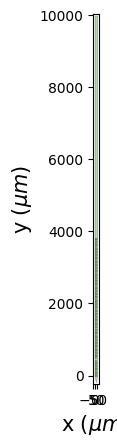

In [5]:
si.plot_probe_map(raw_rec)


In [6]:
rec = raw_rec.astype('float32')
rec = si.bandpass_filter(rec)
rec = si.common_reference(rec)
rec.get_dtype()
rec

CommonReferenceRecording: 384 channels - 30.0kHz - 1 segments - 189,418,428 samples 
                          6,313.95s (1.75 hours) - float32 dtype - 270.97 GiB

In [29]:
%matplotlib ipympl
si.plot_traces(rec, backend='ipywidgets', mode='line')

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [7]:
%gui qt
import ephyviewer

si.plot_traces(rec, backend='ephyviewer', mode='line')

: 

In [ ]:
# %matplotlib ipympl
# si.plot_traces(rec, backend='ipywidgets', mode='map')

In [ ]:
job_kwargs = dict(n_jobs=40, progress_bar=True, chunk_duration="1s")

In [ ]:
recording_corrected, motion, motion_info = si.correct_motion(
        rec, preset="dredge", folder=None, output_motion=True, output_motion_info=True, **job_kwargs
    )


In [ ]:
motion

In [ ]:
si.plot_motion(motion)

In [ ]:
si.plot_motion_info(motion_info, rec,
                   color_amplitude=True,
        amplitude_cmap="inferno",)